In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Turn all categories into numbers one_hot

In [2]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


#Separate Data using scikit-learn

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
#Create the model

# Set random seed
tf.random.set_seed(42)

# Create
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 9191.4502 - mae: 9191.4502
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7843.8066 - mae: 7843.8066
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.9751 - mae: 7585.9751
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7499.1855 - mae: 7499.1855
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7682.7866 - mae: 7682.7866
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.9077 - mae: 7645.9077
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7506.7222 - mae: 7506.7222
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.9619 - mae: 7698.9619
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.1455 - mae: 7623.1455
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.0679 - mae: 7694.0679

In [7]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8681.7754 - mae: 8681.7754


[8681.775390625, 8681.775390625]

#Second Try With Second Model

In [9]:
# Set
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 4740.7559 - mae: 4740.7559


[4740.755859375, 4740.755859375]

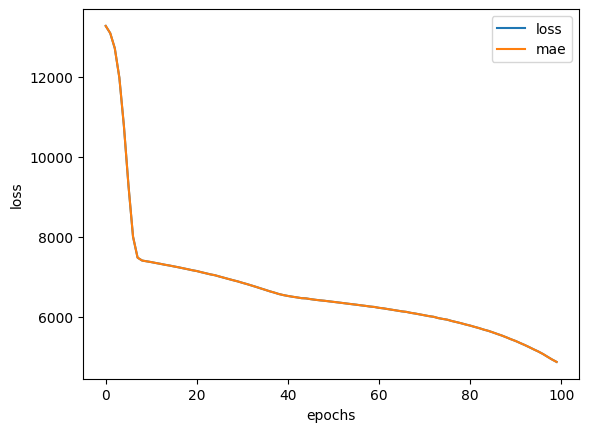

In [12]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [13]:
# Testing 100 more epochs

history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3486.5945 - mae: 3486.5945


(3486.594482421875, 3486.594482421875)

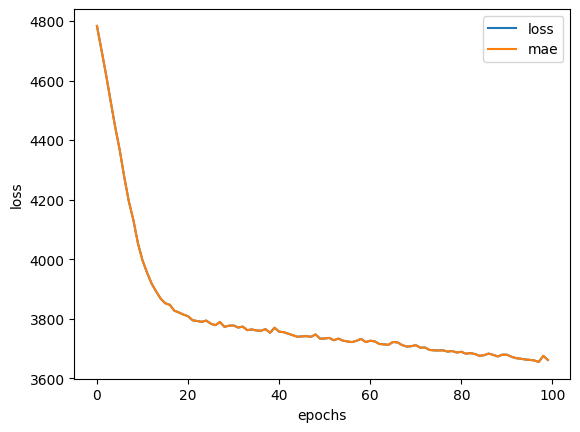

In [14]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

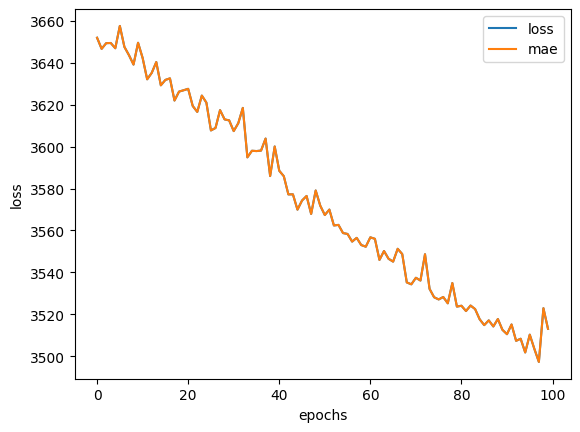

In [16]:
# Testing 100 more epochs

history_3 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Trying normalizing and standardising data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [23]:
# Non-normalized vs Normalized
X_train.loc[0],X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [24]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [37]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_4 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [38]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.4741 - mae: 3169.4741


In [39]:
insurance_model_2_mae, insurance_model_3_mae

(3486.594482421875, 3169.47412109375)

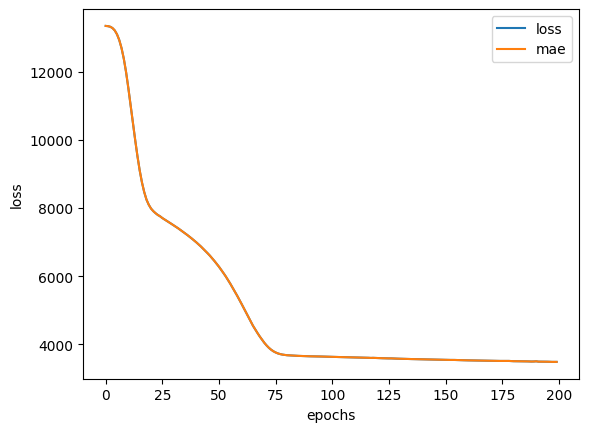

In [40]:
# history_3 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [41]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.4741 - mae: 3169.4741


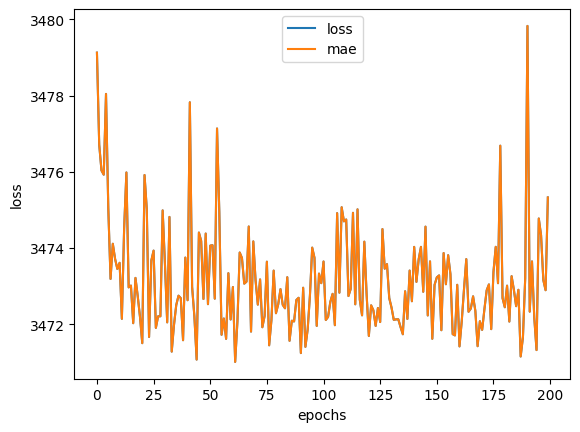

In [42]:
# 200 more

history_5 = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [44]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.5322 - mae: 3163.5322


In [45]:
insurance_model_2_mae, insurance_model_3_mae

(3486.594482421875, 3163.5322265625)

#Ahother Experiment

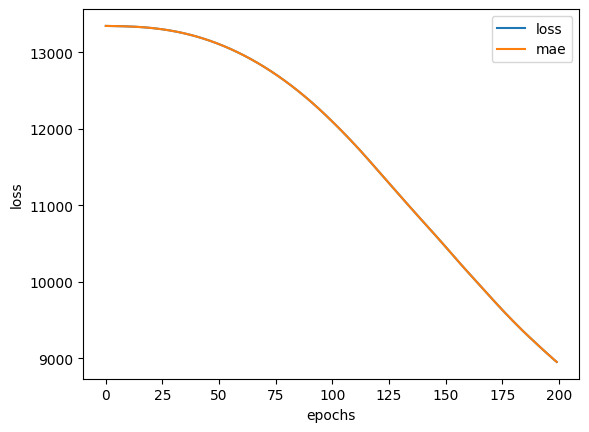

In [35]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #t
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_4_history_1 = insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

pd.DataFrame(insurance_model_4_history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");